In [1]:
pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/38.2 MB ? eta -:--:--
     --------------------------------------- 0.0/38.2 MB 660.6 kB/s eta 0:00:58
     --------------------------------------- 0.0/38.2 MB 495.5 kB/s eta 0:01:17
     --------------------------------------- 0.1/38.2 MB 939.4 kB/s eta 0:00:41
     ---------------------------------------- 0.2/38.2 MB 1.1 MB/s eta 0:00:37
     ---------------------------------------- 0.2/38.2 MB 1.2 MB/s eta 0:00:32
     ---------------------------------------- 0.3/38.2 MB 1.4 MB/s eta 0:00:28
     ---------------------------------------- 0.5/38.2 MB 1.7 MB/s eta 0:00:22
      --------------------------------------- 0.6/38.2 MB 1.9 MB/s eta 0:00:21
      --------------------------------------- 0.7/38.2 MB 2.1 MB/s eta 0:00:18
      --------------------------------------- 0.9/38.2 MB 2.2 MB/s eta 0:00:18
     - --------------------------

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [18 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\user\AppData\Local\Temp\pip-install-su5njcp2\tensorflow-gpu_b436553db03f46f5b3dd74a58aded83e\setup.py", line 37, in <module>
      raise Exception(TF_REMOVAL_WARNING)
  Exception:
  
  The "tensorflow-gpu" package has been removed!
  
  Please install "tensorflow" instead.
  
  Other than the name, the two packages have been identical
  since TensorFlow 2.1, or roughly since Sep 2019. For more
  information, see: pypi.org/project/tensorflow-gpu
  
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  error: subprocess-exited-with-error
  
  Running setup.py install for tensorflow-gpu did not 

In [7]:
pip install opencv-python


  Using cached opencv_python-4.7.0.72-cp37-abi3-win_amd64.whl (38.2 MB)


In [8]:
pip install matplotlib


  Using cached matplotlib-3.7.1-cp310-cp310-win_amd64.whl (7.6 MB)
  Using cached contourpy-1.0.7-cp310-cp310-win_amd64.whl (162 kB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached kiwisolver-1.4.4-cp310-cp310-win_amd64.whl (55 kB)
  Using cached fonttools-4.39.3-py3-none-any.whl (1.0 MB)


In [2]:
pip list

Package                      Version
---------------------------- ---------
absl-py                      1.4.0
asttokens                    2.2.1
astunparse                   1.6.3
backcall                     0.2.0
cachetools                   5.3.0
certifi                      2022.12.7
charset-normalizer           3.1.0
colorama                     0.4.6
comm                         0.1.3
debugpy                      1.6.7
decorator                    5.1.1
executing                    1.2.0
flatbuffers                  23.3.3
gast                         0.4.0
google-auth                  2.17.2
google-auth-oauthlib         1.0.0
google-pasta                 0.2.0
grpcio                       1.53.0
h5py                         3.8.0
idna                         3.4
ipykernel                    6.22.0
ipython                      8.12.0
jax                          0.4.8
jedi                         0.18.2
jupyter_client               8.1.0
jupyter_core                 5.3.0
keras 

In [2]:
import tensorflow as tf
import os

In [3]:
import cv2
import imghdr

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
tf.config.list_physical_devices('GPU')

[]

In [9]:
data_dir = 'fake_real'

In [10]:
os.listdir(data_dir)

['fake', 'real']

In [11]:
tf.data.Dataset??

In [4]:
import numpy as np 
from matplotlib import pyplot as plt

In [8]:
data = tf.keras.utils.image_dataset_from_directory('fake_real', image_size=(224, 224))

Found 74184 files belonging to 2 classes.


In [16]:
data_iterator = data.as_numpy_iterator()

In [17]:
batch = data_iterator.next()

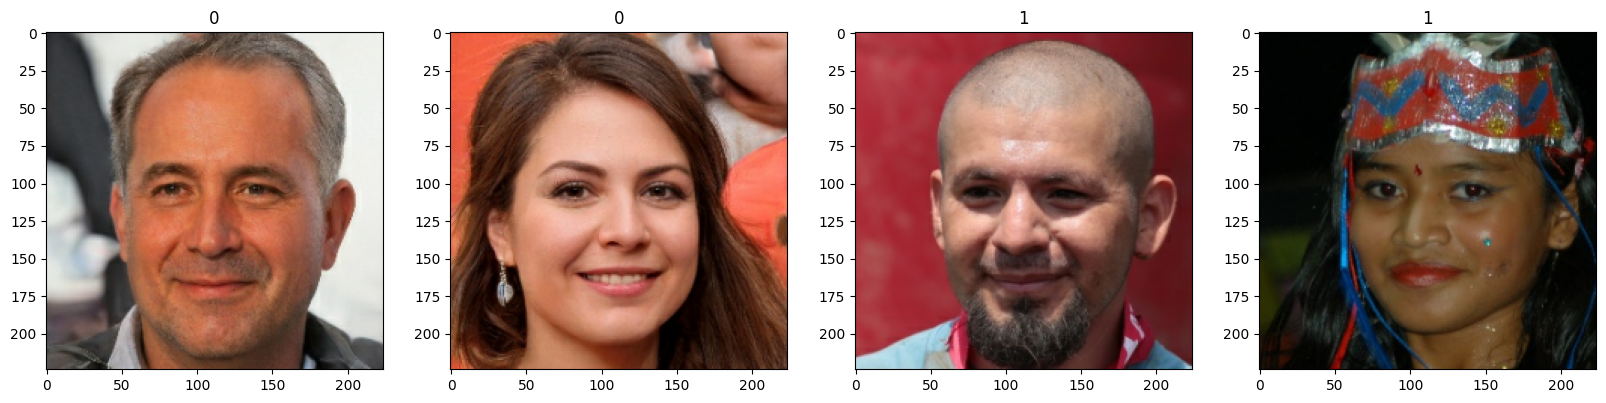

In [12]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [18]:
data = data.map(lambda x,y: (x/255, y))

In [19]:
scaled_iterator = data.as_numpy_iterator()

In [20]:
len(data)

2319

In [21]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [22]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [23]:
model = Sequential()

In [24]:
from keras import regularizers
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.4))
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [8]:
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

In [19]:
base_model = tf.keras.applications.DenseNet201(input_shape=(224,224,3),
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(1)

In [20]:
densenet201 = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

base_learning_rate = 0.0001
densenet201.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [6]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

NameError: name 'model' is not defined

In [21]:
logdir='logs'

In [22]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [23]:
history = densenet201.fit(train,
                    epochs=20,
                    validation_data=val, 
                   callbacks=[tensorboard_callback])

Epoch 1/20
1623/1623 [==============================] - 11803s 7s/step - loss: 0.4273 - accuracy: 0.8153 - val_loss: 0.3970 - val_accuracy: 0.8227
Epoch 2/20
1623/1623 [==============================] - 11337s 7s/step - loss: 0.3818 - accuracy: 0.8280 - val_loss: 0.3717 - val_accuracy: 0.8308
Epoch 3/20
1623/1623 [==============================] - 11492s 7s/step - loss: 0.3619 - accuracy: 0.8376 - val_loss: 0.3590 - val_accuracy: 0.8382
Epoch 4/20
1623/1623 [==============================] - 13486s 8s/step - loss: 0.3499 - accuracy: 0.8436 - val_loss: 0.3473 - val_accuracy: 0.8446
Epoch 5/20
1623/1623 [==============================] - 12238s 8s/step - loss: 0.3408 - accuracy: 0.8477 - val_loss: 0.3406 - val_accuracy: 0.8507
Epoch 6/20
1623/1623 [==============================] - 12295s 8s/step - loss: 0.3340 - accuracy: 0.8510 - val_loss: 0.3349 - val_accuracy: 0.8535
Epoch 7/20
1623/1623 [==============================] - 13109s 8s/step - loss: 0.3279 - accuracy: 0.8541 - val_loss: 0

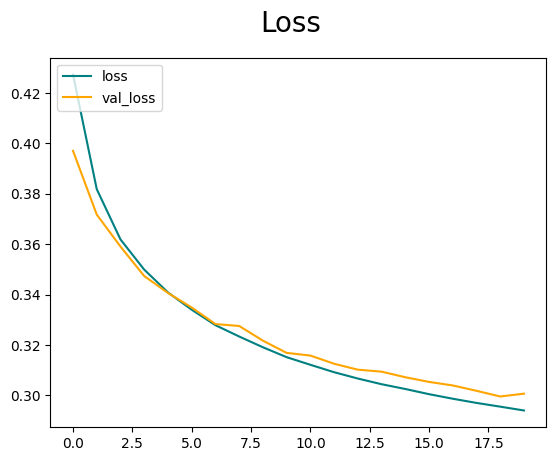

In [24]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

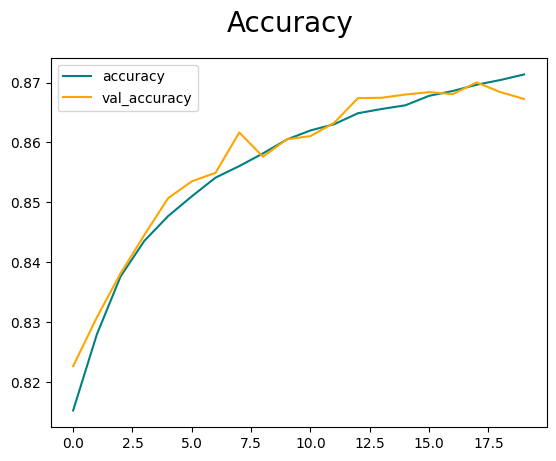

In [25]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [7]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [11]:
import cv2

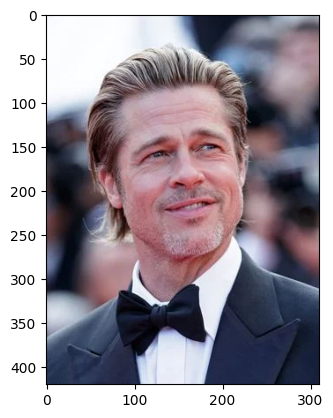

In [80]:
img = cv2.imread('human_face_3.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

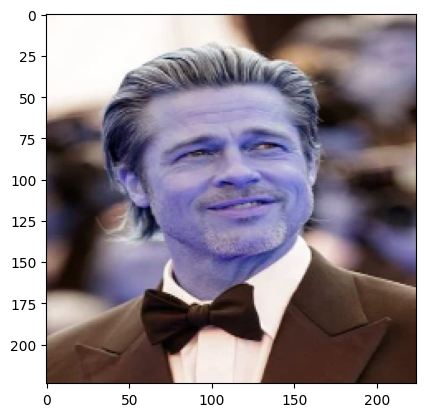

In [81]:
resize = tf.image.resize(img, (224,224))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [82]:
resize.shape

TensorShape([224, 224, 3])

In [83]:
np.expand_dims(resize, 0).shape

(1, 224, 224, 3)

In [23]:
yhat = densenet201.predict(np.expand_dims(resize/255, 0))

NameError: name 'densenet201' is not defined

In [107]:
yhat

array([[-0.4890843]], dtype=float32)

In [108]:
if yhat > 0: 
    print(f'Gerçek')
else:
    print(f'Sahte')

Sahte


In [1]:
from tensorflow.keras.models import load_model

In [42]:
densenet201.save(os.path.join('models','densenet201.h5'))

In [26]:
new_model = load_model(os.path.join('models','fake_real_40_epoch.h5'))

In [27]:
new_model.add(tf.keras.layers.Activation('sigmoid'))

In [29]:
# Modellerin sınıflandırma matrisleri burada hesaplanmıştır
from sklearn.metrics import confusion_matrix

y_true = []  # Gerçek etiketler
y_pred = []  # Tahmin edilen etiketler

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = new_model.predict(X)
    y_pred.extend(yhat.round())  # Tahmin edilen etiketleri listeye ekle
    y_true.extend(y)  # Gerçek etiketleri listeye ekle

cm = confusion_matrix(y_true, y_pred)
print(cm)

1/1 [==============================] - 7s 7s/step
[[5753  219]
 [ 737  691]]


In [84]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 299ms/step


In [85]:
yhatnew

array([[0.76251477]], dtype=float32)

In [86]:
if yhatnew > 0.5: 
    print(f'Gerçek')
else:
    print(f'Sahte')

Gerçek
